Golden Ratio = 1.6261307732005812


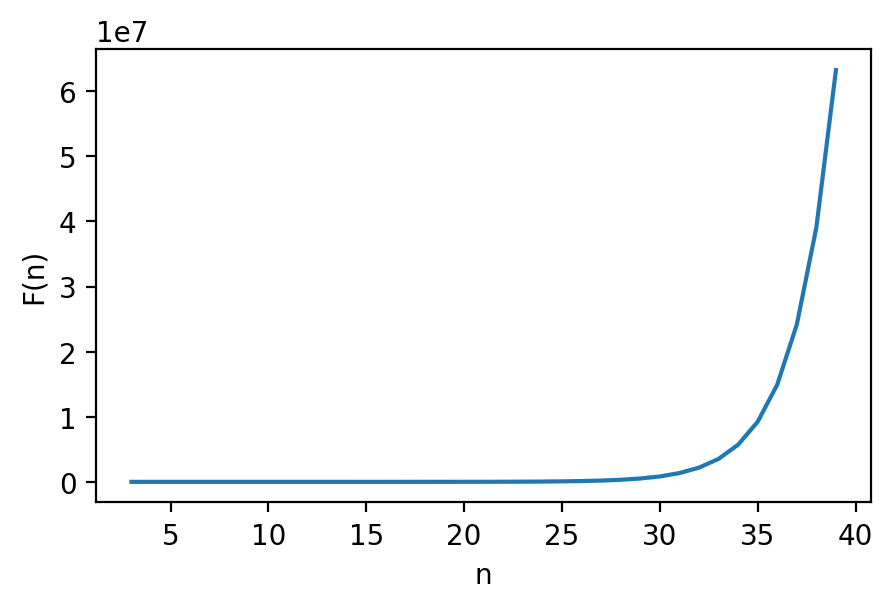

In [119]:
import numpy as np

x = range(3, 40)
y = [fib_mat(i) for i in x]

plt.figure(figsize = (5,3), dpi = 200)
plt.plot(x, y)
plt.ylabel('F(n)')
plt.xlabel('n')

ratio = [fib_mat(i)/fib_mat(i-1) for i in x]

ratio_avg = sum(ratio)/len(ratio)

print('Golden Ratio =' , ratio_avg)

# Recursion Method

In [14]:
def fib_rec(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib_rec(n-1)+fib_rec(n-2)

# Tabulation Method

In [15]:
def fib_tab(n):
    table=[0]*(n+1)
    table[1] = 1
       
    for i in range (2,n+1):
        table[i] = table[i-1] + table[i-2]
        
    return table[n]

# Matrix Method

In [102]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib_mat(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

# Time for each method

In [122]:
import time
import numpy as np
#n_s = [40]
n_s = [2, 10, 50, 100, 500, 1_000, 5_000, 10_000, 50_000]
#n_s = np.linspace(10, 10**6, 11)
#n_s = [int(x) for x in n_s]

#f = open('fib_data.txt', '+')

fib1 = [[], []]
fib2 = [[], []]
fib3 = [[], []]


for n in [2, 10, 15, 20, 25, 30]:
    start_time = time.time()
    temp = fib_rec(n)
    final_time = time.time()-start_time
    fib1[0].append(n)
    fib1[1].append(final_time)
    
#print(fib1)

for n in n_s:
    start_time = time.time()
    temp = fib_tab(n)
    final_time = time.time()-start_time
    fib2[0].append(n)
    fib2[1].append(final_time)
    

for n in n_s:
    start_time = time.time()
    temp = fib_mat(n)
    final_time = time.time()-start_time
    fib3[0].append(n)
    fib3[1].append(final_time)
    
#print(fib1, '\n', fib2, '\n', fib3)
#print(fib2, '\n', fib3)

file = open('fib_data.tab', 'w')

fibs = [fib1, fib2, fib3]

for fib in fibs:
    fib[0].pop(0)
    fib[1].pop(0)
    file.write(str(fib[0])[1:-1])
    file.write('\n')
    file.write(str(fib[1])[1:-1])
    file.write('\n')

# Reading File and Graphing

Text(0, 0.5, '$log_{10}(t)$ (s)')

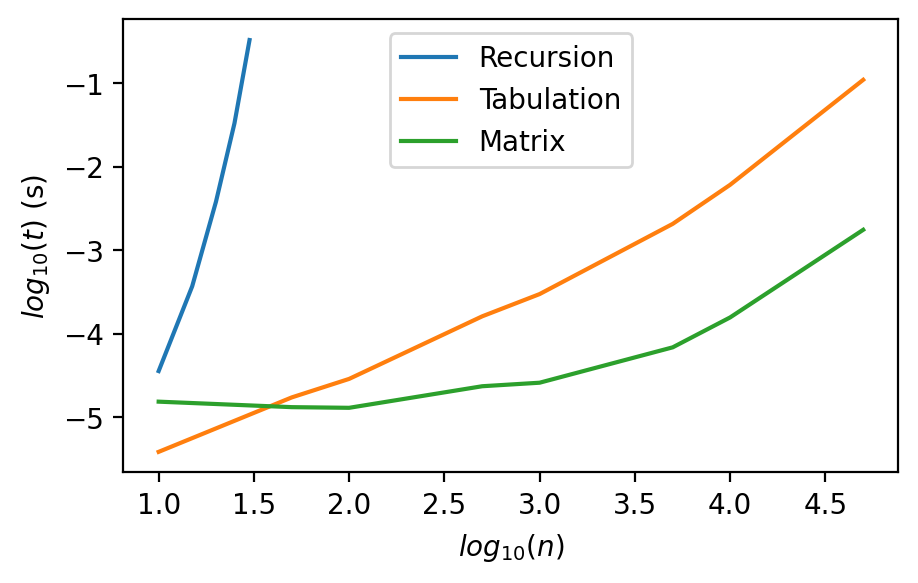

In [127]:
import matplotlib.pyplot as plt
import numpy as np

file = open('fib_data.tab', 'r')

lines = file.readlines()

x_s = []
y_s = []
for pos,line in enumerate(lines):
    line = line.replace(",","")
    read = line.split()
    read = [float(x) for x in read]
    if pos%2 == 0:
        x_s.append(read)
    else:
        y_s.append(read)
    #print(pos, line)

plt.figure(figsize=(5,3), dpi = 200)
method = ['Recursion', 'Tabulation', 'Matrix']
for i in range(0,3):
    x_s[i] = np.log10(x_s[i])
    y_s[i] = np.log10(y_s[i])
    plt.plot(x_s[i], y_s[i], label=method[i])
    
plt.legend()
plt.xlabel(r'$log_{10}(n)$')
plt.ylabel(r'$log_{10}(t)$ (s)')

# Complexity

## Recursion

Recursion is the slowest at $O(2^n)$. This is so due to nature of recursion, it repeats calculations of the same number n in order to do the addition of fib(n-1) + fib(n-2).

For example, fib(5):

fib(5) = fib(4) + fib(3).

fib(4) will be calculated by calling fib(3) and fib(2). The function fib(3) will be called twice in the calculation of fib(5) and fib(4). While fib(2) will be called 4 times, and fib(1) will be called 8 times.

This can be seen in the above function where the recursion method follows a $2^x$ shape.

## Tabulation

Tabulation is a little faster at $O(n)$ time. This is so because it simply iterates from the bottom up and adds the previous two numbers. This method remembers the calculated numbers and is much simpler for time complexity as it doesn't need to do any repetitive function calls and simply stores the calculated numbers into its memories for use in the next iteration. As seen in the graph above, it also has a fairly linear shape.

In a step by step basis:
1. Defines an array $O(1)$
2. Pushes 0 and 1 into the array $O(1)$
3. Defines a for loop that is called n times $O(n)$
4. Adds the two previous values together and add them to the current index $O(1)$

Therefore overall it has a $O(n)$ complexity

## Matrix

Matrix manipulation is the fastest algorithm to calculate the fibonacci sequence, it relies on performing matrix algebra to calculate the Fibonacci sequence and it does by doing a recursion of the function to create a matrix of half the n. This algorithm makes it so that you don't have to do n number of calls and will only need to divide it in half until you reach 1. Thus giving us an $O(log_2(n))$ runtime, or more specifically a $O_log(n)$ runtime.